# Sieci Konwolucyjne

## Wprowadzenie

<b>Splot</b> (<b>mnożenie splotowe, konwolucje</b>) definiujemy jako:

$$ (f_1 \ast f_2)(t) = \int_{-\infty}^{\infty} f_1(\tau)f_2(t - \tau)d\tau $$

i dla przypadków dyskretnych:


$$ (f_1 \ast f_2)[n] = \sum_{m = -\infty}^{\infty} f_1[n]f_2[n - m] $$



Splot jest działaniem:

- <b>przemiennym:</b> $$f_1 \ast f_2 = f_2 \ast f_1 $$

- <b>łącznym:</b> $$(f_1 \ast f_2)\ast f_3 = f_1 \ast (f_2 \ast f_3)$$

- <b>rozdzielnym względem dodawania:</b> $$ (f_1 + f_2) \ast f_3 = f_1 \ast f_3 + f_2 \ast f_3$$

Intuicyjnie możemy traktować splot jako ważenie jednej funkcji za pomocą drugiej. Dobrze pokazuje to przykład wyznaczania splotu dyskretnego:

[![splot macierzy](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196&zoom=2)](https://ujwlkarn.files.wordpress.com/2016/07/convolution_schematic.gif?w=268&h=196&zoom=2)


W postaci kodu:

In [1]:
input = [1 1 1 0 0; 0 1 1 1 0; 0 0 1 1 1; 0 0 1 1 0; 0 1 1 0 0]
filter = [1 0 1; 0 1 0; 1 0 1]

3×3 Matrix{Int64}:
 1  0  1
 0  1  0
 1  0  1

In [2]:
function convolution(input, filter)
    n_in, m_in = size(input)
    n_f, m_f = size(filter)
    conv = zeros(n_in - n_f + 1, m_in - m_f + 1)
    for (i,j) in Tuple.(CartesianIndices(conv))
        conv[i,j] = sum(input[i:i+n_f-1,j:j+m_f-1].*filter)
    end
    conv
end

convolution (generic function with 1 method)

In [3]:
convolution(input, filter)

3×3 Matrix{Float64}:
 4.0  3.0  4.0
 2.0  4.0  3.0
 2.0  3.0  4.0

### Korelacja wzajemna (krzyżowa), autokorelacja

Podobną miarą do mnożenia splotowego jest <b>korelacja krzyżowa</b>, czyli miara podobieństwa dwóch szeregów czasowych przesuniętych od siebie o $\Delta t$:
$$ (f_1 \star f_2)(\Delta t) = \int_{-\infty}^{\infty} f_1(\tau)f_2(\Delta t + \tau)dt $$

i dla przypadków dyskretnych:


$$ (f_1 \star f_2)[n] = \sum_{m = -\infty}^{\infty} f_1[n]f_2[n + m] $$

jej szczególnym przypadkiem jest <b>autokorelacja</b>.

[![splot macierzy](https://upload.wikimedia.org/wikipedia/commons/2/21/Comparison_convolution_correlation.svg)](https://en.wikipedia.org/wiki/Cross-correlation)

### Zastosowania 

Do podstawowych zastosowań splotu możemy zaliczyć:

- Wyliczanie średniej ruchomej:

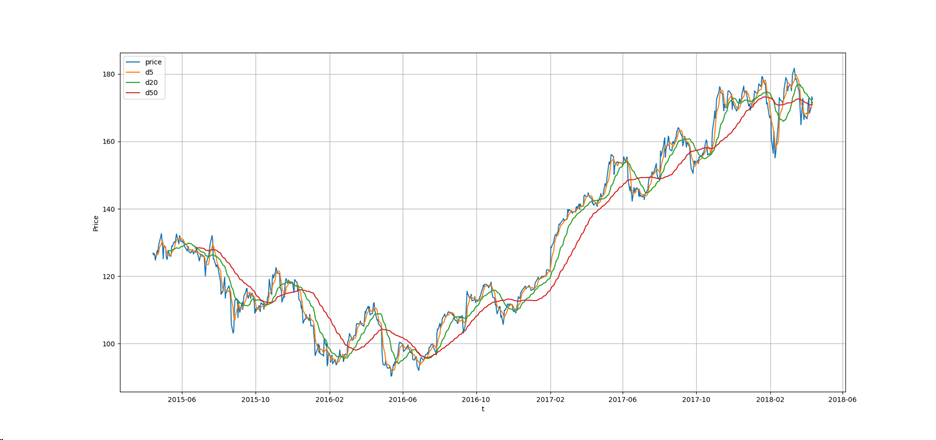

- Jądrowy estymator gęstości:

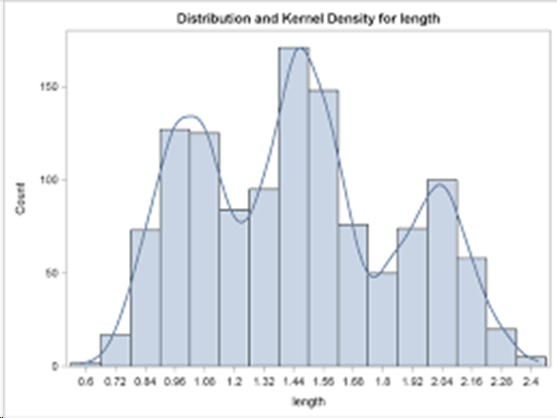

- Modulacja dźwięku (np. pogłos):

In [4]:
using WAV, DSP

In [5]:
isfile("count-30-to-0.wav") ||
  download("https://github.com/bartoszpankratz/221660-0553-Aproksymacja/blob/master/3.%20Sieci%20konwolucyjne/count-30-to-0.wav?raw=true","count-30-to-0.wav")

true

In [6]:
x, f = wavread("count-30-to-0.wav");
x = vec(x);

In [7]:
#wavplay(x, f);

In [8]:
output = DSP.conv(x, x./100);

In [9]:
wavwrite(output, f, "audio_filtering_original_smoothed.wav");
#wavplay(output, f);

- Filtrowanie obrazów (np. wykrywanie krawędzi):

In [10]:
using Images, TestImages

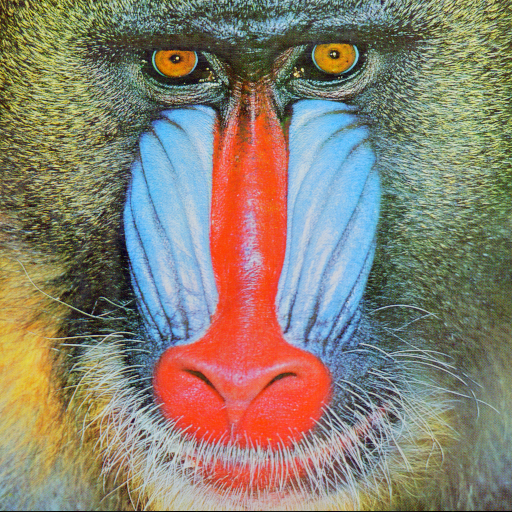

In [11]:
img = testimage("mandrill")
img

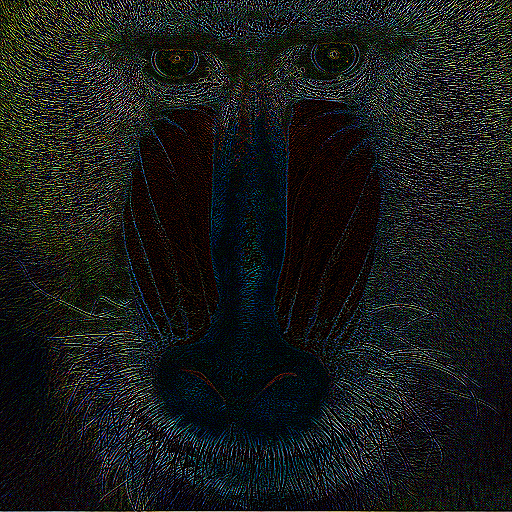

In [12]:
imfilter(img, Kernel.Laplacian())

## Sieci konwolucyjne (CNN)

[![](https://res.mdpi.com/entropy/entropy-19-00242/article_deploy/html/images/entropy-19-00242-g001.png)](https://towardsdatascience.com/how-to-teach-a-computer-to-see-with-convolutional-neural-networks-96c120827cd1)

Klasyczna architektura sieci konwolucyjnej sprowadza się do trzech specificznych, następujących po sobie warstw:

#### Warstwa konwolucyjna

Jest to podstawowa warstwa głębokiej sieci neuronowej. Jak wiemy konwolucje możemy nałożyć jako filtr na [różne typy danych](https://en.wikipedia.org/wiki/Kernel_%28image_processing%29). Jest to też sposób w jaki przygotowuje się dane do pracy z klasycznymi modelami uczenia maszynowego. Jednak w takim wypadku musimy sami przyjąć jakie filtry będą nam potrzebne i kiedy.
Co jednak jeśli bylibyśmy w stanie zbudować model, który sam nauczy się które filtry są najodpowiedniejsze dla danego zagadnienia?

Na tym właśnie polega uczenie sieci konwolucyjnych. Zamiast klasycznych wag wykorzystuje się jądra konwolucji (zwane <b>mapami własności</b> - <i>feature maps</i>), które są optymalizowane w procesie uczenia.

In [13]:
#code based on the: https://github.com/FluxML/Flux.jl/blob/master/src/layers/conv.jl#L183
using Flux

function conv_filter(filter::NTuple{N,Integer}, ch::Pair{<:Integer,<:Integer};
          init = Flux.glorot_uniform) where N
  cin, cout = ch
  init(filter..., cin, cout)
end

conv_filter (generic function with 1 method)

In [14]:
filters = conv_filter((3,3), 1 => 3)

3×3×1×3 Array{Float32, 4}:
[:, :, 1, 1] =
 -0.212298  -0.201979  -0.330799
  0.382474  -0.319576  -0.238174
  0.249745  -0.39676    0.294772

[:, :, 1, 2] =
 -0.0720925  -0.0619799  -0.0015242
  0.198838    0.300357    0.121322
  0.0372905  -0.205954   -0.20576

[:, :, 1, 3] =
 0.0451663  -0.0163457  0.292675
 0.381831    0.151966   0.0697218
 0.387794   -0.393083   0.223487

In [15]:
test_img = Float32.(Gray.(img));

In [16]:
conv_image = cat([convolution(test_img,filters[:,:,1,i]) for i = 1:size(filters)[end]]..., dims = 4);

#### Wprowadzenie nieliniowości (<i>detector stage</i>):

Konwolucja jest ze swojej definicji operacją liniową, w rzeczywistości relacje pomiędzy elementami otaczającej nas rzeczywistości są nieliniowe. Z sieci neuronowych korzystamy przede wszystkim w celu ich wychwytywania, przez co aby poprawić jakość aproksymacji konieczne jest przemonożenie wyników otrzymanych na warstwie konwolucyjnej przez nieliniową funkcję aktywacji (np. <b>ReLU</b>)

In [17]:
detector_image = Flux.relu.(conv_image);

#### Pooling

Pooling możemy traktować jako "przycinanie" danych wychodzących z poprzedniej warstwy:

[![](http://ufldl.stanford.edu/wiki/images/0/08/Pooling_schematic.gif)](http://ufldl.stanford.edu/wiki/index.php/Pooling)

Wykorzystujemy go z kilku powodów:
- Przede wszystkim zmniejsza on rozmiar danych na każdej kolejnej warstwie, dzięki temu możemy zbudować głębsze modele, które będą się efektywniej uczyły.
- Dzięki temu, że kolejne obrazy są coraz gorszej jakości (mają mniejszy rozmiar) są one coraz bardziej odporne na przeuczenie.
- Pooling wiąże się też z założeniem o "stacjonarności" własności obrazu - zakładamy, że własność wykryta na jednym obszarze obrazu jest równie ważna na innych.
- Ponadto dzięki poolingowi aproksymacja <b>niezmienna względem nieznacznych przekształceń danych wejściowych i skali obrazu</b>.

Istnieje kilka podstawowych rodzajów poolingu:
- <b>max-pooling</b>
- <b>min-pooling</b>
- <b>mean-pooling</b>

In [18]:
function max_pool(input, kernel_size::Tuple{Int,Int}, stride = kernel_size)
    pooled_input = zeros(Int.((size(input) .-kernel_size) .÷ stride .+ 1))
    for (i,j) in Tuple.(CartesianIndices(pooled_input))
        k = (i-1) * kernel_size[1] .+ 1
        l = (j-1) * kernel_size[2] .+ 1
        pooled_input[i,j] = maximum(input[k:k+kernel_size[1]-1,l:l+kernel_size[2]-1])
    end
    pooled_input
end
   

max_pool (generic function with 2 methods)

In [19]:
pooled_image = cat([max_pool(detector_image[:,:,1,i], (5,5)) for i = 1:size(detector_image)[end]]..., dims = 4);

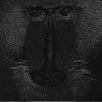

In [31]:
Gray.(pooled_image[:,:,1,2])

## Przykład

Zacznijmy od wczytania bibliotek i [danych](https://github.com/zalandoresearch/fashion-mnist):

In [23]:
using Flux, Statistics, CUDA
using Flux: onehotbatch, onecold, crossentropy, throttle, params
using Base.Iterators: repeated, partition
using Printf, BSON, JLD2, LinearAlgebra
using ImageCore, Images
using MLDatasets: convert2image, FashionMNIST

In [24]:
train_set = FashionMNIST(:train)

dataset FashionMNIST:
  metadata  =>    Dict{String, Any} with 4 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

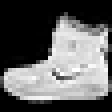

In [25]:
convert2image(FashionMNIST, train_set.features)[:,:,1]

In [26]:
use_cuda = true

true

In [27]:
 if use_cuda && CUDA.functional()
    device = gpu
    @info "Training on GPU"
else
    device = cpu
    @info "Training on CPU"
end

[ Info: Training on GPU


Przyjmijmy podstawowe parametry uczenia:

In [28]:
epochs = 150;
batch_size = 64;

Zdefiniujmy funkcję, która podzieli nam zbiór na partycje o rozmiarze <tt>batch_size</tt>:

In [29]:
function make_minibatch(X, Y, idxs)
    X_batch = Array{Float32}(undef, size(X)[1], size(X)[2], 1, length(idxs))
    for i in 1:length(idxs)
        X_batch[:, :, 1, i] = Float32.(X[:, :, idxs[i]])
    end
    Y_batch = onehotbatch(Y[idxs], 0:9)
    return (X_batch, Y_batch)
end


make_minibatch (generic function with 1 method)

Podzielmy zbiór:

In [32]:
mb_idxs = partition(1:size(train_set.features)[3], batch_size)
train_set = [make_minibatch(train_set.features, train_set.targets, i) for i in mb_idxs] |> device

938-element Vector{Tuple{CuArray{Float32, 4, CUDA.Mem.DeviceBuffer}, Flux.OneHotArray{UInt32, 10, 1, 2, CuArray{UInt32, 1, CUDA.Mem.DeviceBuffer}}}}:
 ([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; … ;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 1 0 … 0 0])
 ([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; … ;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.

┌ Warning: Performing scalar indexing on task Task (runnable) @0x000002117b938f90.
│ Invocation of getindex resulted in scalar indexing of a GPU array.
│ This is typically caused by calling an iterating implementation of a method.
│ Such implementations *do not* execute on the GPU, but very slowly on the CPU,
│ and therefore are only permitted from the REPL for prototyping purposes.
│ If you did intend to index this array, annotate the caller with @allowscalar.
└ @ GPUArraysCore C:\Users\barto\.julia\packages\GPUArraysCore\uOYfN\src\GPUArraysCore.jl:106


Przygotujmy zbiór testowy:

In [33]:
# Prepare test set as one giant minibatch:
test_set = FashionMNIST(:test)
test_set = make_minibatch(test_set.features, test_set.targets, 1:size(test_set.features)[3]) |> device

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; … ;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 0 … 0 0; 0 0 … 1 0; … ; 0 0 … 0 0; 1 0 … 0 0])

Zdefiniujmy model:

In [34]:
model = Chain(
    Conv((3, 3), 1=>16, pad=(1,1), relu),
    MaxPool((2,2)),
    Conv((3, 3), 16=>32, pad=(1,1), relu),
    MaxPool((2,2)),
    Conv((3, 3), 32=>32, pad=(1,1), relu),
    MaxPool((2,2)),
    x -> reshape(x, :, size(x, 4)),
    Dense(288, 128),
    Dense(128, 10),
    softmax,
) |> device

Chain(
  Conv((3, 3), 1 => 16, relu, pad=1),   # 160 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 16 => 32, relu, pad=1),  # 4_640 parameters
  MaxPool((2, 2)),
  Conv((3, 3), 32 => 32, relu, pad=1),  # 9_248 parameters
  MaxPool((2, 2)),
  var"#10#11"(),
  Dense(288 => 128),                    # 36_992 parameters
  Dense(128 => 10),                     # 1_290 parameters
  NNlib.softmax,
)                   # Total: 10 arrays, 52_330 parameters, 2.297 KiB.

Sprekompilujmy model:

In [35]:
model(train_set[1][1])

10×64 CuArray{Float32, 2, CUDA.Mem.DeviceBuffer}:
 0.104088   0.105191   0.105605   …  0.100703   0.100278   0.103444
 0.0906877  0.0978773  0.0956842     0.100975   0.0969831  0.0994411
 0.0975306  0.088775   0.0971705     0.0917996  0.090443   0.0879165
 0.0961085  0.100439   0.0993023     0.0994127  0.0952977  0.0991895
 0.0912031  0.0894695  0.0955295     0.0962316  0.0983928  0.094795
 0.101874   0.100305   0.0990297  …  0.0986921  0.104506   0.106809
 0.101604   0.098557   0.100324      0.101117   0.100351   0.0964465
 0.0958194  0.09718    0.100975      0.0965008  0.100079   0.104537
 0.131512   0.142108   0.117303      0.127672   0.122302   0.113913
 0.0895726  0.0800981  0.0890756     0.0868952  0.091368   0.0935084

Zdefiniujmy funkcję straty:

In [36]:
function loss(x, y, device = device)
    x = x |>cpu
    x_aug = x .+ 0.1f0*randn(eltype(x), size(x)) |> device
    y_hat = model(x_aug)
    return crossentropy(y_hat, y) 
end


loss (generic function with 2 methods)

In [37]:
loss(test_set[1],test_set[2])

2.3193634f0

In [38]:
accuracy(x, y) = mean(onecold(model(x)) .== onecold(y))

accuracy (generic function with 1 method)

In [39]:
@time accuracy(test_set[1],test_set[2])

  9.135796 seconds (17.36 M allocations: 1.149 GiB, 2.91% gc time, 89.78% compilation time)


0.1

i optymalizator:

In [40]:
opt = ADAM(0.001)

Adam(0.001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

Zacznijmy trenować model:

In [41]:
@info("Beginning training loop...")
best_acc = 0.0
last_improvement = 0
for epoch = 1:epochs
    global best_acc, last_improvement
    Flux.train!(loss, params(model), train_set, opt)
    acc = accuracy(test_set[1],test_set[2])
    @info(@sprintf("[%d]: Test accuracy: %.4f", epoch, acc))
    if acc >= 0.95
        @info(" -> Early-exiting: We reached our target accuracy of 95%")
        break
    end
    if acc >= best_acc
        @info(" -> New best accuracy! Saving model out to fashionMNIST_conv.bson")
        ps = cpu.(params(model))
        BSON.@save "fashionMNIST_conv.bson" ps
        jldsave("fashionMNIST_conv.jld2"; ps)
        best_acc = acc
        last_improvement = epoch
    end
    if epoch - last_improvement >= 5 && opt.eta > 1e-10
        opt.eta /= 10.0
        @warn(" -> Haven't improved in a while, dropping learning rate to $(opt.eta)!")
        last_improvement = epoch
    end
    if epoch - last_improvement >= 10
        @warn(" -> We're calling this converged.")
        break
    end
end

[ Info: Beginning training loop...
[ Info: [1]: Test accuracy: 0.8480
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_conv.bson
[ Info: [2]: Test accuracy: 0.8675
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_conv.bson
[ Info: [3]: Test accuracy: 0.8717
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_conv.bson
[ Info: [4]: Test accuracy: 0.8816
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_conv.bson
[ Info: [5]: Test accuracy: 0.8832
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_conv.bson
[ Info: [6]: Test accuracy: 0.8847
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_conv.bson
[ Info: [7]: Test accuracy: 0.8880
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_conv.bson
[ Info: [8]: Test accuracy: 0.8867
[ Info: [9]: Test accuracy: 0.8910
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_conv.bson
[ Info: [10]: Test accuracy: 0.8902
[ Info: [11]: Test acc

[ Info: [70]: Test accuracy: 0.8962
[ Info: [71]: Test accuracy: 0.8962
[ Info: [72]: Test accuracy: 0.8962
┌ Warning:  -> We're calling this converged.
└ @ Main In[41]:27


Wczytajmy wynik:

In [42]:
  isfile("fashionMNIST_conv.bson") ||
download("https://github.com/bartoszpankratz/221660-0553-Aproksymacja/blob/master/5.%20Sieci%20konwolucyjne/fashionMNIST_conv.bson?raw=true")

model = Chain(
    Conv((3, 3), 1=>16, pad=(1,1), relu),
    MaxPool((2,2)),
    Conv((3, 3), 16=>32, pad=(1,1), relu),
    MaxPool((2,2)),
    Conv((3, 3), 32=>32, pad=(1,1), relu),
    MaxPool((2,2)),
    x -> reshape(x, :, size(x, 4)),
    Dense(288, 128),
    Dense(128, 10),
    softmax,
) |> device

ps = cpu.(params(model))

BSON.@load "fashionMNIST_conv.bson" ps

Flux.loadparams!(model, device.(ps))


In [43]:
accuracy(test_set[1],test_set[2])

0.8966

In [44]:
  isfile("fashionMNIST_conv.jld2") ||
download("https://github.com/bartoszpankratz/221660-0553-Aproksymacja/blob/master/5.%20Sieci%20konwolucyjne/fashionMNIST_conv.jld2?raw=true")

model = Chain(
    Conv((3, 3), 1=>16, pad=(1,1), relu),
    MaxPool((2,2)),
    Conv((3, 3), 16=>32, pad=(1,1), relu),
    MaxPool((2,2)),
    Conv((3, 3), 32=>32, pad=(1,1), relu),
    MaxPool((2,2)),
    x -> reshape(x, :, size(x, 4)),
    Dense(288, 128),
    Dense(128, 10),
    softmax,
) |> device


ps = JLD2.load("fashionMNIST_conv.jld2", "ps")

Flux.loadparams!(model, device.(ps))


In [45]:
accuracy(test_set[1],test_set[2])

0.8966

In [46]:
con = Chain(model.layers[1:1]...)

Chain(
  Conv((3, 3), 1 => 16, relu, pad=1),   # 160 parameters
) 

In [47]:
using Images

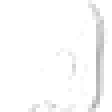

In [48]:
pic = 1 .- con(train_set[1][1])[:,:,1,1] |> cpu
Gray.(pic)

I dla porównania:

In [49]:
mlp =   Chain(x -> reshape(x, :, size(x, 4)),
        Dense(784,256, relu),
        Dropout(0.4),
        Dense(256,128, relu),
        Dropout(0.4),
        Dense(128,10, relu),
        softmax,
) |> device

Chain(
  var"#16#17"(),
  Dense(784 => 256, relu),              # 200_960 parameters
  Dropout(0.4),
  Dense(256 => 128, relu),              # 32_896 parameters
  Dropout(0.4),
  Dense(128 => 10, relu),               # 1_290 parameters
  NNlib.softmax,
)                   # Total: 6 arrays, 235_146 parameters, 944 bytes.

In [50]:
α = 2.0f-6
function mlp_loss(x, y)
    y_hat = mlp(x)
    return crossentropy(y_hat, y) 
end
mlp_accuracy(x, y) = mean(onecold(mlp(x)) .== onecold(y))

mlp_accuracy (generic function with 1 method)

In [51]:
mlp_accuracy(test_set[1],test_set[2])

0.0158

In [52]:
opt = ADAM(0.0001)

Adam(0.0001, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [53]:
@info("Beginning training loop...")
best_acc = 0.0
last_improvement = 0
for epoch = 1:epochs
    global best_acc, last_improvement
    Flux.train!(mlp_loss, params(mlp), train_set, opt)
    acc = mlp_accuracy(test_set[1],test_set[2])
    @info(@sprintf("[%d]: Test accuracy: %.4f", epoch, acc))
    if acc >= 0.95
        @info(" -> Early-exiting: We reached our target accuracy of 95%")
        break
    end
    if acc >= best_acc
        @info(" -> New best accuracy! Saving model out to fashionMNIST_mlp.bson")
        ps = cpu.(params(mlp))
        BSON.@save "fashionMNIST_mlp.bson" ps
        jldsave("fashionMNIST_mlp.jld2"; ps)
        best_acc = acc
        last_improvement = epoch
    end
    if epoch - last_improvement >= 5 && opt.eta > 1e-10
        opt.eta /= 10.0
        @warn(" -> Haven't improved in a while, dropping learning rate to $(opt.eta)!")
        last_improvement = epoch
    end
    if epoch - last_improvement >= 10
        @warn(" -> We're calling this converged.")
        break
    end
end

[ Info: Beginning training loop...
[ Info: [1]: Test accuracy: 0.7931
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [2]: Test accuracy: 0.8235
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [3]: Test accuracy: 0.8352
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [4]: Test accuracy: 0.8436
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [5]: Test accuracy: 0.8513
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [6]: Test accuracy: 0.8534
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [7]: Test accuracy: 0.8577
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [8]: Test accuracy: 0.8613
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [9]: Test accuracy: 0.8654
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_ml

[ Info: [56]: Test accuracy: 0.8952
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [57]: Test accuracy: 0.8956
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [58]: Test accuracy: 0.8956
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [59]: Test accuracy: 0.8951
[ Info: [60]: Test accuracy: 0.8928
[ Info: [61]: Test accuracy: 0.8975
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [62]: Test accuracy: 0.8964
[ Info: [63]: Test accuracy: 0.8979
[ Info:  -> New best accuracy! Saving model out to fashionMNIST_mlp.bson
[ Info: [64]: Test accuracy: 0.8961
[ Info: [65]: Test accuracy: 0.8976
[ Info: [66]: Test accuracy: 0.8961
[ Info: [67]: Test accuracy: 0.8974
[ Info: [68]: Test accuracy: 0.8961
┌ Warning:  -> Haven't improved in a while, dropping learning rate to 1.0e-5!
└ @ Main In[53]:23
[ Info: [69]: Test accuracy: 0.8977
[ Info: [70]: Test accuracy: 0.897

In [54]:
  isfile("fashionMNIST_mlp.bson") ||
download("https://github.com/bartoszpankratz/221660-0553-Aproksymacja/blob/master/5.%20Sieci%20konwolucyjne/fashionMNIST_mlp.bson?raw=true")

mlp =   Chain(x -> reshape(x, :, size(x, 4)),
        Dense(784,256, relu),
        Dropout(0.4),
        Dense(256,128, relu),
        Dropout(0.4),
        Dense(128,10, relu),
        softmax,
) |> device

ps = cpu.(params(mlp))

BSON.@load "fashionMNIST_mlp.bson" ps

Flux.loadparams!(mlp, device.(ps))


In [55]:
mlp_accuracy(test_set[1],test_set[2])

0.899

In [56]:
  isfile("fashionMNIST_mlp.jld2") ||
download("https://github.com/bartoszpankratz/221660-0553-Aproksymacja/blob/master/5.%20Sieci%20konwolucyjne/fashionMNIST_mlp.jld2?raw=true")

mlp =   Chain(x -> reshape(x, :, size(x, 4)),
        Dense(784,256, relu),
        Dropout(0.4),
        Dense(256,128, relu),
        Dropout(0.4),
        Dense(128,10, relu),
        softmax,
) |> device

ps = JLD2.load("fashionMNIST_mlp.jld2", "ps")

Flux.loadparams!(mlp, device.(ps))


In [57]:
mlp_accuracy(test_set[1],test_set[2])

0.899

## Dlaczego sieci konwolucyjne są efektywne?

[Goodfellow, Bengio & Courville, Deep Learning (2016), rozdział 9](http://www.deeplearningbook.org/contents/convnets.html)

Sieci konwolucyjne posiadają kilka właściwości, które umożliwiają efektywniejsze uczenie:

### Rzadkie interakcje (<i>sparse interactions</i>, <i>sparse connectivity</i>)

Filtry, które wykorzystujemy do uczenia sieci konwolucyjnych są zazwyczaj wyraźnie mniejsze niż wektory danych wejściowych, dzięki czemu do ich przechowywania wykorzystujemy mniej pamięci a ich szacowanie wymaga mniejszej ilości operacji.

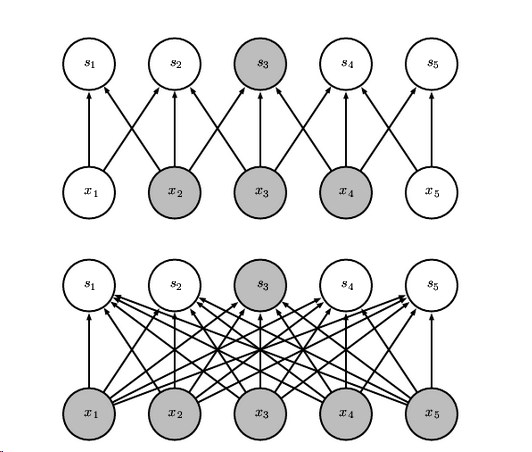

### Współdzielenie parametrów (<i>parameter sharing</i>):

Właściwość związana z rzadkimi interakcjami. W porównaniu z wielowartstwowymi perceptronami wagi, które wykorzystujemy do uczenia sieci konwolucyjnych wykorzystujemy do aproksymacji wielu zmiennych wejściowych jednocześnie (mówimy, że są one <b>związane</b>). Dzięki temu możemy przechowywać znacznie mniej informacji niż w wypadku innych modeli.

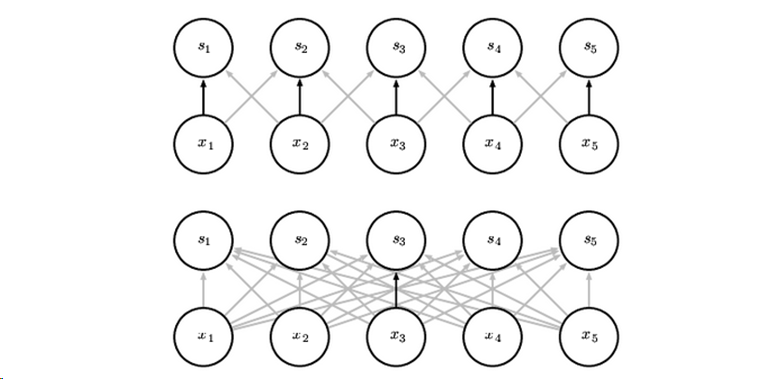

### Niezmienność względem przesunięcia  (<i>equivariant to  translation</i>).

Definiujemy ją jako:

$$ f(g(I))=g(f(I)) $$

Oznacza ona to, że równoległe przesunięcie funkcji (mapy własności) nie modyfikuje jej rezultatów. Dzięki temu możemy wykorzystać ten sam filtr do wykrywania charakterystyk w różnych fragmentach obrazu. 

### Niezmienność względem nieznacznych przekształceń  danych wejściowych i skali obrazu (<i>invariant to local translation</i>).


Niezmienność możemy zdefiniować jako: 

$$ f(g(I))=f(I) $$

Właściwość ta wynika bezpośrednio z faktu korzystania z poolingu podczas budowy sieci konwolucyjnych - poprzez uoqólnianie obrazu do coraz mniejszej macierzy jesteśmy w stanie wykorzystać mapy własności do rozpoznawania obiektów, które są obrócone, oświetlone w inny sposób, etc.

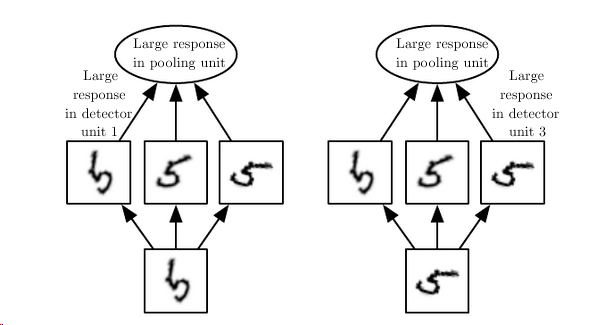

## Dodatkowa praca domowa

1. Sprawdź czy można jeszcze poprawić efektywność predykcji prezentowanej na zajęciach sieci, jeżeli tak to zaprezentuj taki model, prześlij kod i model zapisany w formacie <tt>BSON</tt> z implementacją modelu w postaci notebooka, [wskazówka](https://github.com/zalandoresearch/fashion-mnist) <b>(10 punktów)</b>.

<b>Uwaga:</b> Poprawiony model musi mieć trafność predykcji na zbiorze testowym większą niż 92%, w przypadku gdy trafność będzie większa niż 96% oddanie pracy domowej oznacza zaliczenie przedmiotu z oceną 5.


## Cifar-10

[Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html) to jeden z klasycznych zbiorów do benchmarku sieci neuronowych. Składa się z 60 000 kolorowych obrazów o wymiarach $ 32 \times 32$ podzielonych na 10 kategorii. Uchodzi za jeden z najtrudniejszych zbiorów do klasyfikacji. W jego przypadku konieczne jest wykorzystanie [bardziej złożonych architektur](https://arxiv.org/pdf/1409.1556.pdf).

In [ ]:
using Flux, Metalhead, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Metalhead: trainimgs
using Images: channelview
using Statistics: mean
using Base.Iterators: partition

# VGG16 and VGG19 models

vgg16() = Chain(
  Conv((3, 3), 3 => 64, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(64),
  Conv((3, 3), 64 => 64, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(64),
  x -> maxpool(x, (2, 2)),
  Conv((3, 3), 64 => 128, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(128),
  Conv((3, 3), 128 => 128, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(128),
  x -> maxpool(x, (2,2)),
  Conv((3, 3), 128 => 256, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(256),
  Conv((3, 3), 256 => 256, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(256),
  Conv((3, 3), 256 => 256, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(256),
  x -> maxpool(x, (2, 2)),
  Conv((3, 3), 256 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  x -> maxpool(x, (2, 2)),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  x -> maxpool(x, (2, 2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(512, 4096, relu),
  Dropout(0.5),
  Dense(4096, 4096, relu),
  Dropout(0.5),
  Dense(4096, 10),
  softmax) |> gpu

vgg19() = Chain(
  Conv((3, 3), 3 => 64, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(64),
  Conv((3, 3), 64 => 64, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(64),
  x -> maxpool(x, (2, 2)),
  Conv((3, 3), 64 => 128, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(128),
  Conv((3, 3), 128 => 128, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(128),
  x -> maxpool(x, (2, 2)),
  Conv((3, 3), 128 => 256, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(256),
  Conv((3, 3), 256 => 256, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(256),
  Conv((3, 3), 256 => 256, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(256),
  Conv((3, 3), 256 => 256, relu, pad=(1, 1), stride=(1, 1)),
  x -> maxpool(x, (2, 2)),
  Conv((3, 3), 256 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  x -> maxpool(x, (2, 2)),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  BatchNorm(512),
  Conv((3, 3), 512 => 512, relu, pad=(1, 1), stride=(1, 1)),
  x -> maxpool(x, (2, 2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(512, 4096, relu),
  Dropout(0.5),
  Dense(4096, 4096, relu),
  Dropout(0.5),
  Dense(4096, 10),
  softmax) |> gpu

# Function to convert the RGB image to Float64 Arrays

getarray(X) = Float32.(permutedims(channelview(X), (2, 3, 1)))

# Fetching the train and validation data and getting them into proper shape

X = trainimgs(CIFAR10)
imgs = [getarray(X[i].img) for i in 1:50000]
labels = onehotbatch([X[i].ground_truth.class for i in 1:50000],1:10)
train = gpu.([(cat(imgs[i]..., dims = 4), labels[:,i]) for i in partition(1:49000, 100)])
valset = collect(49001:50000)
valX = cat(imgs[valset]..., dims = 4) |> gpu
valY = labels[:, valset] |> gpu

# Defining the loss and accuracy functions

m = vgg16()

loss(x, y) = crossentropy(m(x), y)

accuracy(x, y) = mean(onecold(m(x), 1:10) .== onecold(y, 1:10))

# Defining the callback and the optimizer

evalcb = throttle(() -> @show(accuracy(valX, valY)), 10)

opt = ADAM()

# Starting to train models

Flux.train!(loss, params(m), train, opt, cb = evalcb)

# Fetch the test data from Metalhead and get it into proper shape.
# CIFAR-10 does not specify a validation set so valimgs fetch the testdata instead of testimgs

test = valimgs(CIFAR10)

testimgs = [getarray(test[i].img) for i in 1:10000]
testY = onehotbatch([test[i].ground_truth.class for i in 1:10000], 1:10) |> gpu
testX = cat(testimgs..., dims = 4) |> gpu

# Print the final accuracy

@show(accuracy(testX, testY))